<a href="https://colab.research.google.com/github/BankNatchapol/CPE463-Image-Processing/blob/main/CPE463_intensity_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

from skimage import io
import pandas as pd

Original : (900, 1200)


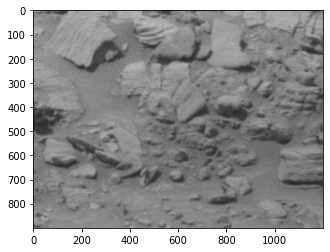

In [2]:
image = io.imread('https://s.hdnux.com/photos/41/61/34/8853302/3/1200x0.jpg', as_gray=True) *255

print("Original :", image.shape)
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.show()

# **Brightness modification**
modify brightness with math operations, Add Subtract and Multiply. 

In [3]:
def brightMod(image, constant, mode="add"):
  """
  Image brightness modification with 3 mode, add subtract and multiply with constant.

  Parameter:
    image: numpy array gray-scale image 
    constant: constant value to apply with image
    mode: 3 mode to apply with image
          add: add image with constant
          subtract: subtract image with constant
          multiply: multiply image with constant
  
  Return:
    new_image: modified numpy array gray-scale image 
  """

  if mode == "add":
    # add image with constant, if more than 255 then return 255
    def add(x):
      if x+constant>255:
        return 255
      else:
        return x+constant
    # function is add
    f = add

  elif mode == "subtract":
    # subtract image with constant, if less than 0 then return 0
    def subtract(x):
      if x-constant<0:
        return 0
      else:
        return x-constant
    #funciton is subtract
    f = subtract

  elif mode == "multiply":
    # multiply image with constant, if more than 255 then return 255 
    # if less than 0 return 0
    def multiply(x):
      if x*constant>255:
        return 255
      elif x*constant<0:
        return 0
      else:
        return x*constant
    # function  is multiply
    f = multiply

  else:
    assert 0, "Mode not recognized."

  # apply function with each image element
  fun = np.vectorize(f)
  new_image = fun(image)

  return new_image


In [4]:
names = ["Original", "-100", "+100", "X2", "/2"] # plot names
 
modified_images = [image,
                    brightMod(image, 50, mode="subtract"),  
                    brightMod(image, 50, mode="add"),
                    brightMod(image, 1.5, mode="multiply"),
                    brightMod(image, 0.5, mode="multiply")]

Compare <br>
image-100$\quad$ image+100$\quad$ imagex2$\quad$ image/2

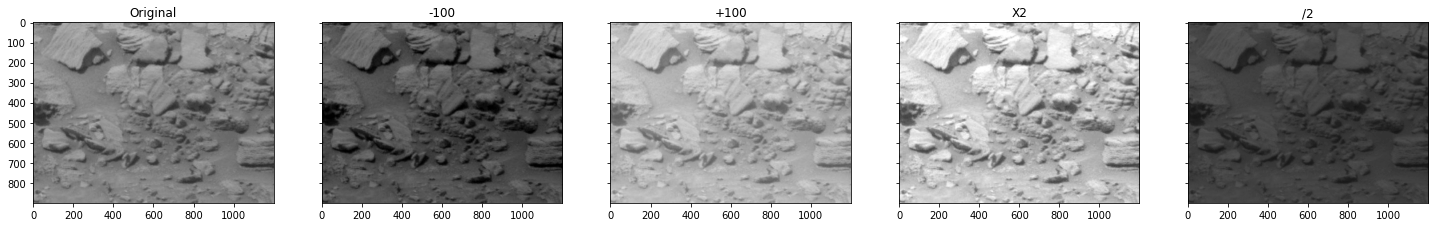

In [5]:
# down scale plot size
down_scale = 35

fig, axs = plt.subplots(1, 5, sharey=True, figsize = (image.shape[0]//down_scale, 
                                                      image.shape[1]//down_scale))

for i in range(len(modified_images)):
  axs[i].imshow(modified_images[i], cmap="gray", vmin=0, vmax=256)
  axs[i].title.set_text(names[i])

plt.show();

Image histogram plot of <br>
image-100$\quad$ image+100$\quad$ imagex2$\quad$ image/2

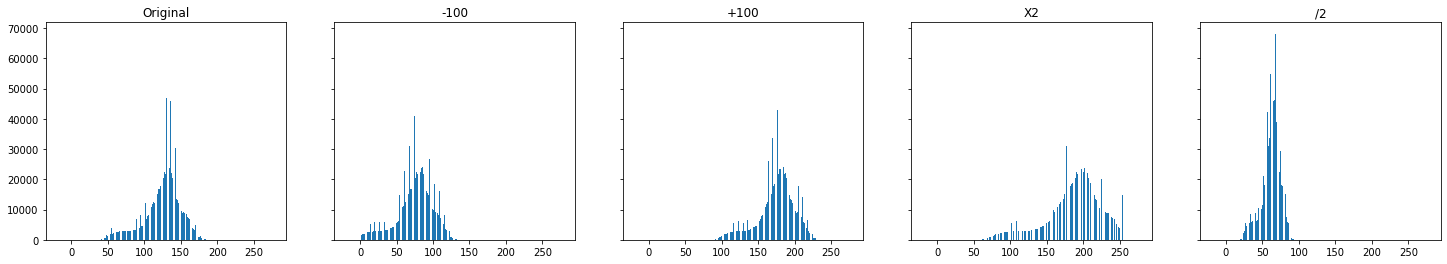

In [6]:
fig, axs = plt.subplots(1, 5, sharey=True, figsize = (25, 4))

for i in range(len(modified_images)):
  histogram, bin_edges = np.histogram(modified_images[i], bins=256, range=(-20, 280))
  axs[i].bar(bin_edges[0:-1], histogram)
  axs[i].title.set_text(names[i])

plt.show()

# **Contrast stretching**
Contrast stretching is a simple image enhancement technique that attempts to improve the contrast in an image by 'stretching' the range of intensity values it contains to span a desired range of values, the full range of pixel values that the image type concerned allows.

In [7]:
def contrastStretching(image):
  # normalize image with min/max scaler
  return (image - image.min())/(image.max() - image.min()) *255

In [8]:
norm_image = contrastStretching(image)

names = ["Original", "Norm"]
norm_images = [image, norm_image]

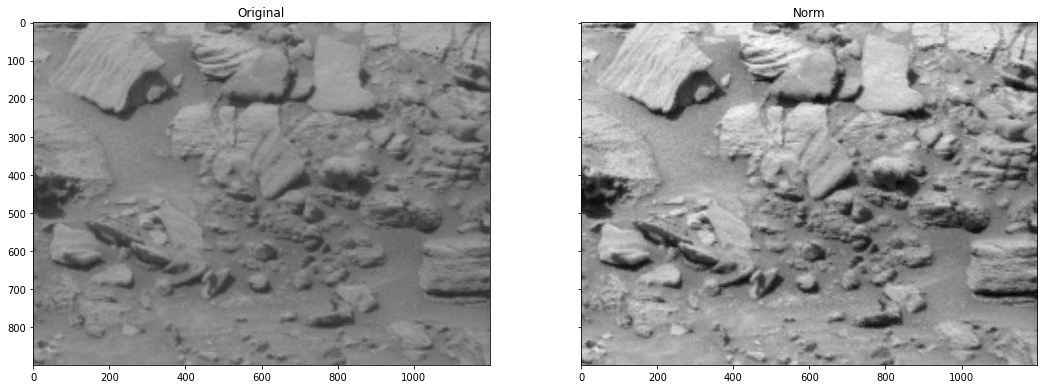

In [9]:
down_scale = 50

fig, axs = plt.subplots(1, 2, sharey=True, figsize = (image.shape[0]//down_scale, 
                                                      image.shape[1]//down_scale))

for i in range(len(norm_images)):
  axs[i].imshow(norm_images[i], cmap="gray", vmin=0, vmax=256)
  axs[i].title.set_text(names[i])

plt.show()

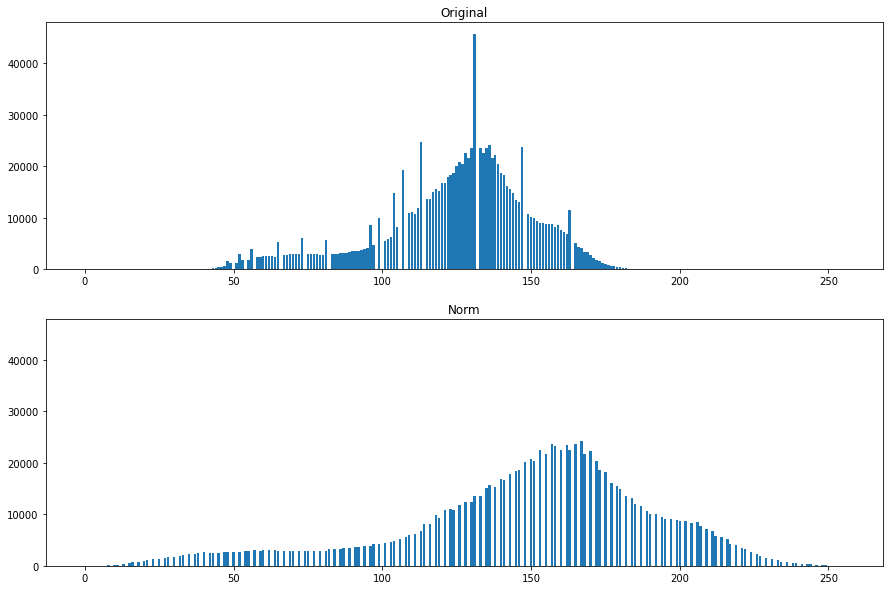

In [10]:
fig, axs = plt.subplots(2, 1, sharey=True, figsize = (15, 10))

for i in range(len(norm_images)):
  histogram, bin_edges = np.histogram(norm_images[i], bins=256, range=(0, 256))
  axs[i].bar(bin_edges[0:-1], histogram)
  axs[i].title.set_text(names[i])

plt.show()

# **Histogram equalization**
Histogram Equalization is a computer image processing technique used to improve contrast in images. It accomplishes this by effectively spreading out the most frequent intensity values, i.e. stretching out the intensity range of the image. This method usually increases the global contrast of images when its usable data is represented by close contrast values. This allows for areas of lower local contrast to gain a higher contrast.

In [11]:
def hist_eq(image):
  """
  Apply histogram equalization to an image.

  Parameter:
    image: numpy array gray-scale image
  
  Return:
    eqed_image: equalized image
    eq_table: equalized table
  """

  # calculate N(g) value
  def ng(g):
    return max([0, round(255*eq_table["c(g)"][int(g)]/(image.shape[0]*image.shape[1])) - 1])
  
  # get frequency of image
  histogram, bin_edges = np.histogram(image.astype("uint8"), bins=256, range=(0, 256))

  eq_table = pd.DataFrame({"g":bin_edges[0:-1], "f":histogram})
  eq_table["c(g)"] = np.cumsum(histogram)
  eq_table["N(g)"] = list(map(ng, eq_table["g"]))

  # mapping original pixel into equalized pixel
  f = lambda x:eq_table["N(g)"].iloc[int(x)]
  fun = np.vectorize(f)
  eqed_image = fun(image)

  return eqed_image, eq_table

In [12]:
eqed_image, eq_table = hist_eq(image)

names = ["Original", "Equalized image"]
eqed_images = [image, eqed_image]

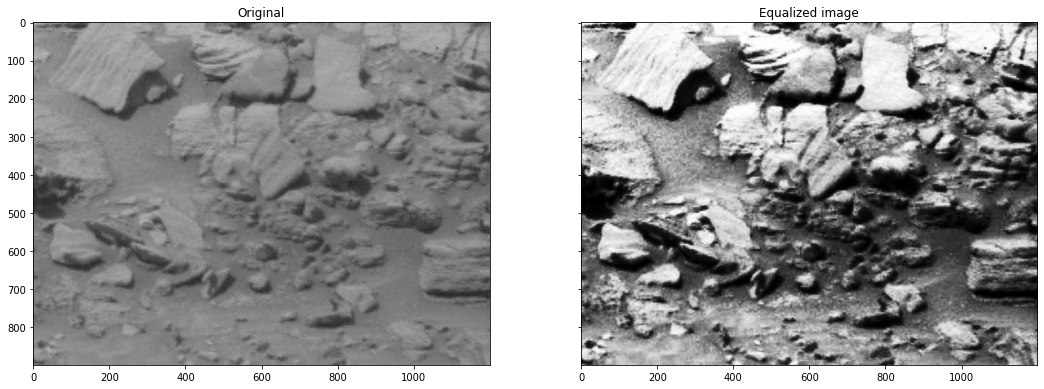

In [13]:
down_scale = 50

fig, axs = plt.subplots(1, 2, sharey=True, figsize = (image.shape[0]//down_scale, 
                                                      image.shape[1]//down_scale))

for i in range(len(eqed_images)):
  axs[i].imshow(eqed_images[i], cmap="gray", vmin=0, vmax=256)
  axs[i].title.set_text(names[i])

plt.show()

In [14]:
eq_table

,g,f,c(g),N(g)
0,0.0,0,0,0
1,1.0,0,0,0
2,2.0,0,0,0
3,3.0,0,0,0
4,4.0,0,0,0
...,...,...,...,...
251,251.0,0,1080000,254
252,252.0,0,1080000,254
253,253.0,0,1080000,254
254,254.0,0,1080000,254


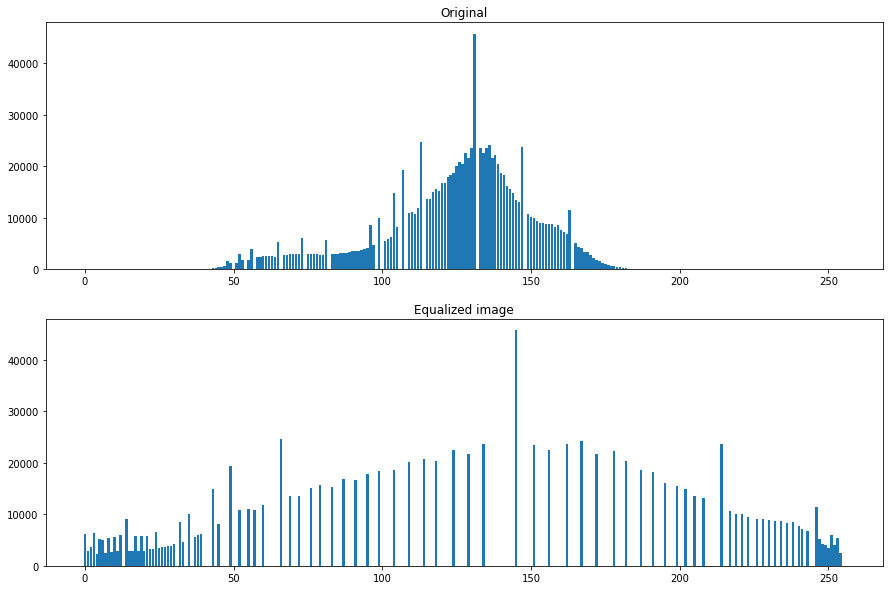

In [15]:
fig, axs = plt.subplots(2, 1, sharey=True, figsize = (15, 10))

for i in range(len(eqed_images)):
  histogram, bin_edges = np.histogram(eqed_images[i], bins=256, range=(0, 256))
  axs[i].bar(bin_edges[0:-1], histogram)
  axs[i].title.set_text(names[i])

plt.show()

# **Histogram matching**
Histogram matching is a process where a time series, image, or higher dimension scalar data is modified such that its histogram matches that of another (reference) dataset. 

In [16]:
def target(image):
  # define target image
  return (image/2)+100

In [17]:
target_image = target(image)

names = ["Original", "Target: Original/2 + 100"]
ortar_images = [image, target_image]

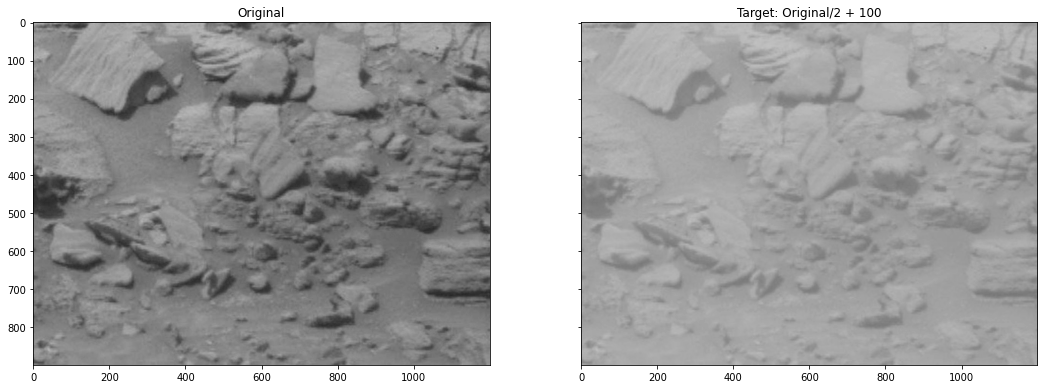

In [18]:
down_scale = 50

fig, axs = plt.subplots(1, 2, sharey=True, figsize = (image.shape[0]//down_scale, 
                                                      image.shape[1]//down_scale))

for i in range(len(ortar_images)):
  axs[i].imshow(ortar_images[i], cmap="gray", vmin=0, vmax=256)
  axs[i].title.set_text(names[i])

plt.show()

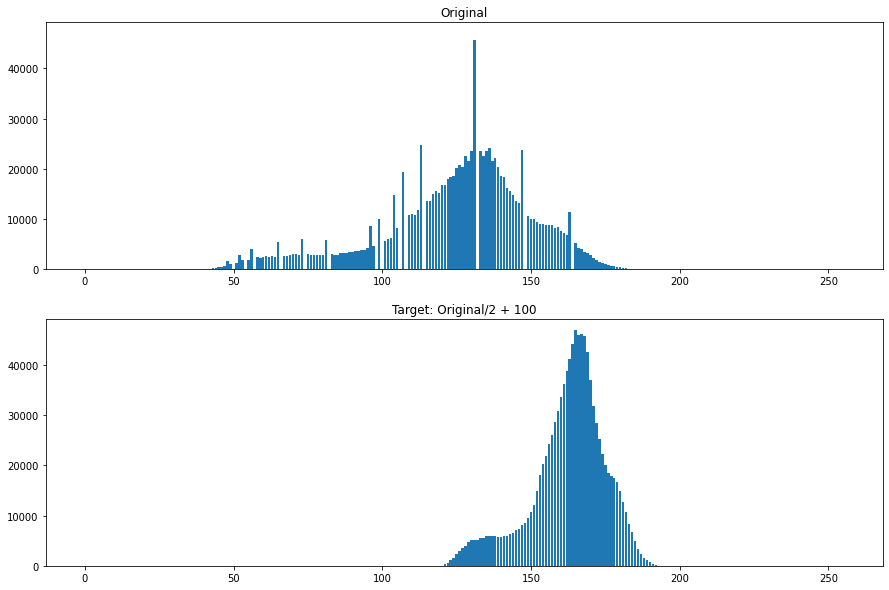

In [19]:
fig, axs = plt.subplots(2, 1, sharey=True, figsize = (15, 10))

for i in range(len(ortar_images)):
  histogram, bin_edges = np.histogram(ortar_images[i], bins=256, range=(0, 256))
  axs[i].bar(bin_edges[0:-1], histogram)
  axs[i].title.set_text(names[i])

plt.show()

In [20]:
def hist_matching(original, target):
  """
  Apply histogram matching to match original image into target image histogram shape.

  Parameter:
    original: original image
    target: target image
  
  Return:
    matched_image: matched image
  """

  def hist_eq(image):
    # histogram equalization
    def ng(g):
      return max([0, round(255*eq_table["c(g)"][int(g)]/(image.shape[0]*image.shape[1])) - 1])
      
    histogram, bin_edges = np.histogram(image.astype("uint8"), bins=256, range=(0, 256))

    eq_table = pd.DataFrame({"g":bin_edges[0:-1], "f":histogram})
    eq_table["c(g)"] = np.cumsum(histogram)
    eq_table["N(g)"] = list(map(ng, eq_table["g"]))

    f = lambda x:eq_table["N(g)"].iloc[int(x)]
    fun = np.vectorize(f)
    eqed_image = fun(image)

    return eqed_image, eq_table

  def find_closest(l, num):
    # find closest number in list
    mi = min(l, key=lambda x:abs(x-num))
    ind = l.index(mi)
    return ind, mi

  # get original and target equalized histogram 
  _ , eq_table_original = hist_eq(original.astype("uint8"))
  _ , eq_table_target = hist_eq(target.astype("uint8"))

  # get matching table to match original value into target value
  matching_table = []
  check_list = list(eq_table_target["N(g)"].values)
  for i in range(len(eq_table_original)):
    ind, _ = find_closest(check_list, eq_table_original["N(g)"].iloc[i])
    matching_table.append(eq_table_target["g"].iloc[ind])

  eq_table_original["Matched"] = matching_table

  # match data
  f = lambda x:eq_table_original["Matched"].iloc[int(x)]
  fun = np.vectorize(f)
  matched_image = fun(image)

  return matched_image

In [21]:
names = ["Original", "Target: Original/2 + 100", "Matched image"]

matched_image = hist_matching(original=image, target=target_image)
matched_images = [image, target_image, matched_image]

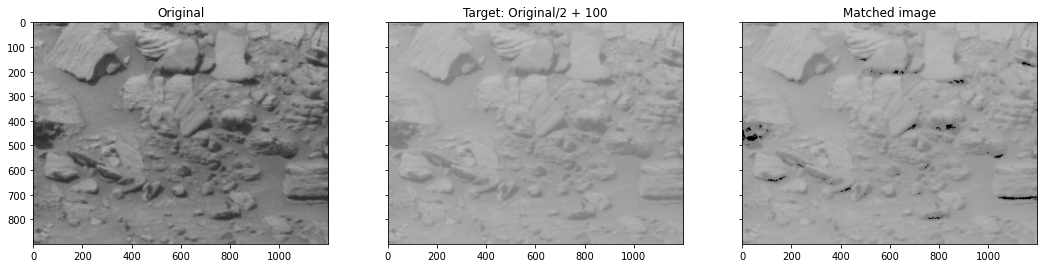

In [22]:
down_scale = 50

fig, axs = plt.subplots(1, 3, sharey=True, figsize = (image.shape[0]//down_scale, 
                                                      image.shape[1]//down_scale))

for i in range(len(matched_images)):
  axs[i].imshow(matched_images[i], cmap="gray", vmin=0, vmax=256)
  axs[i].title.set_text(names[i])

plt.show()

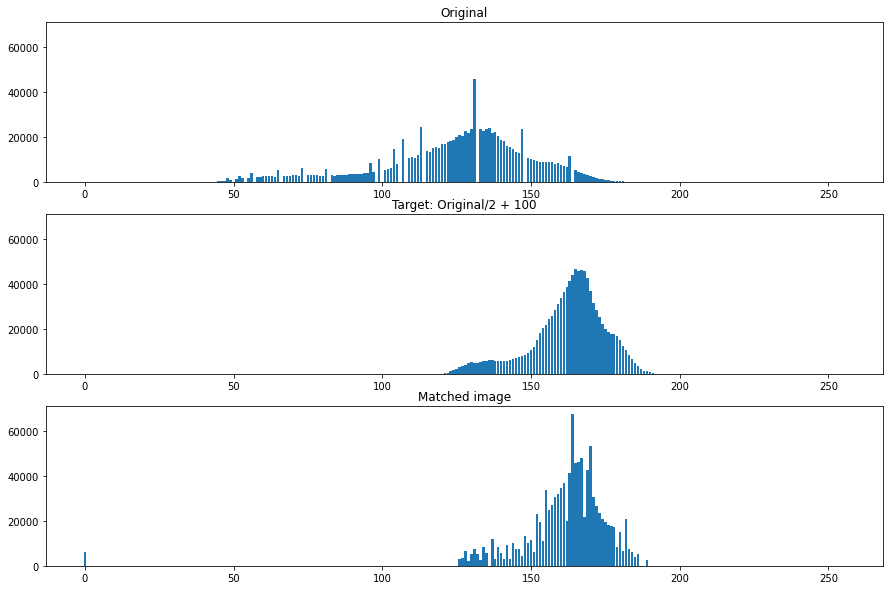

In [23]:
fig, axs = plt.subplots(3, 1, sharey=True, figsize = (15, 10))

for i in range(len(matched_images)):
  histogram, bin_edges = np.histogram(matched_images[i], bins=256, range=(0, 256))
  axs[i].bar(bin_edges[0:-1], histogram)
  axs[i].title.set_text(names[i])

plt.show()

# **Local enhancement**
Local Enhancement essentially takes into consideration the local properties of the image by moving a window/mask throughout
the image from pixel to pixel. The histogram of the points in the window is calculated and then a histogram equilization transfer
function is used to map the grey levels of the pixel in the center of the mask.

Original : (700, 463)


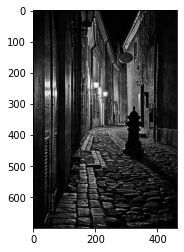

In [24]:
image = io.imread('https://i.pinimg.com/originals/5c/65/21/5c6521e0063482b8f1c7d4963723b92b.jpg', as_gray=True) *255

print("Original :", image.shape)
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.show()

In [25]:
def localEnhancement(image, transform_func, window_size=7):
  """
  Apply transform function with subregion of image(window).

  Parameter:
    image: numpy array gray-scale image
    transform_func: function to transform each window
    window_size: size of window
  
  Return:
    output: modified image
  """

  # get all window range 
  n = [[i*window_size, i*window_size + window_size] for i in range(image.shape[1]//window_size)]
  n[-1][1] += image.shape[0]%window_size

  m = [[i*window_size, i*window_size + window_size] for i in range(image.shape[0]//window_size)]
  m[-1][1] += image.shape[0]%window_size

  from tqdm import tqdm
  output = np.zeros_like(image)

  # apply transform function into each element of image
  for v_s, v_l in tqdm(m, position=0, leave=True):
    for h_s, h_l in n:
      eq_hist_image = transform_func(image[v_s:v_l, h_s:h_l])

      output[v_s:v_l, h_s:h_l] = eq_hist_image

  return output

def histEq1Output(image):
  # get output of histogram equalization only 1 output
  image,_ = hist_eq(image)
  return image

In [26]:
window_size = 15

names = ["Original", "Histogram equalization", f"Local enhancement({window_size}x{window_size}): Histogram equalization"]

hist_eq_image, _ = hist_eq(image)
hist_eq_local_image = localEnhancement(image, histEq1Output, window_size=window_size)
local_images = [image, hist_eq_image, hist_eq_local_image]

100%|██████████| 46/46 [00:10<00:00,  4.26it/s]


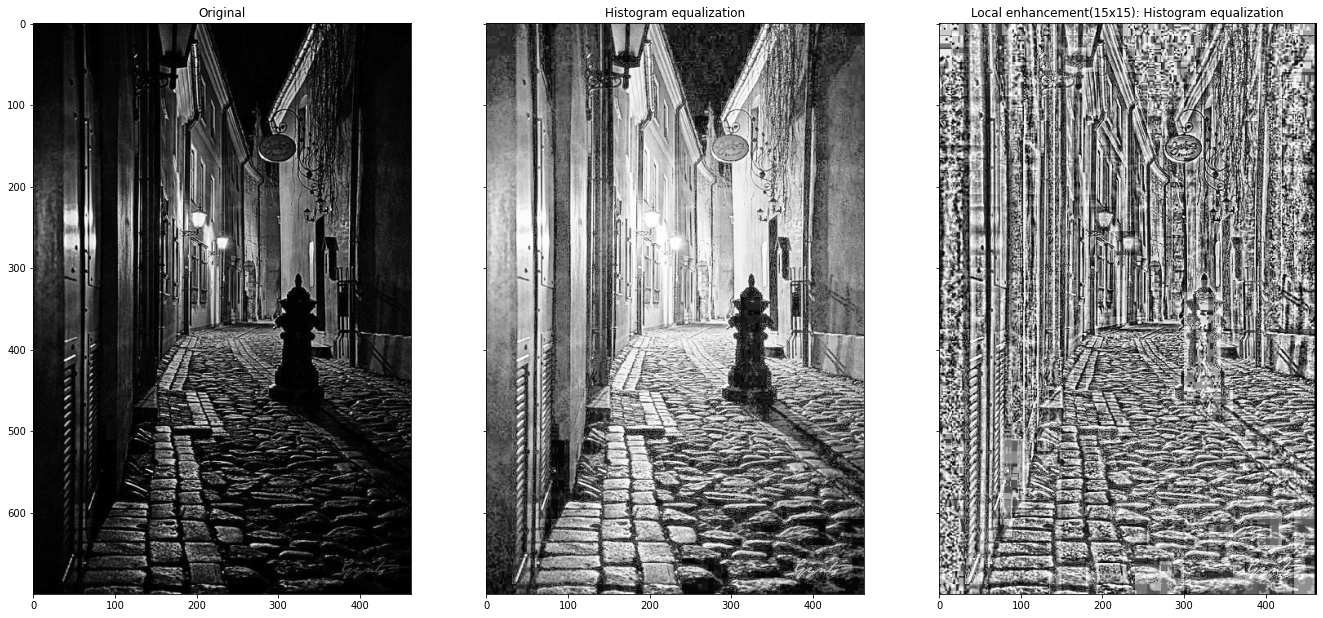

In [27]:
down_scale = 30

fig, axs = plt.subplots(1, 3, sharey=True, figsize = (image.shape[0]//down_scale, 
                                                      image.shape[1]//down_scale))

for i in range(len(local_images)):
  axs[i].imshow(local_images[i], cmap="gray", vmin=0, vmax=256)
  axs[i].title.set_text(names[i])

plt.show()

# **Arithmetic/Logic operations**
is to apply math operations with 2 images.

In [28]:
def andOps(image, mask):
  # image and operator 
  mask = mask//255
  return image*mask

def orOps(image, mask):
  # image or operator
  f = lambda x: 255 if x>255 else x
  fun = np.vectorize(f)
  return fun(image + mask)

In [29]:
black_mask = np.zeros_like(image)
black_mask[300:460, 290:360] = 255
and_image = andOps(image, black_mask)

white_mask = np.ones_like(image) * 255
white_mask[300:460, 290:360] = 0
or_image = orOps(image, white_mask)

names1 = ["Original", "Black mask", "AND"]
names2 = ["Original", "White mask", "OR"]

masked_images1 = [image, black_mask, and_image]
masked_images2 = [image, white_mask, or_image]

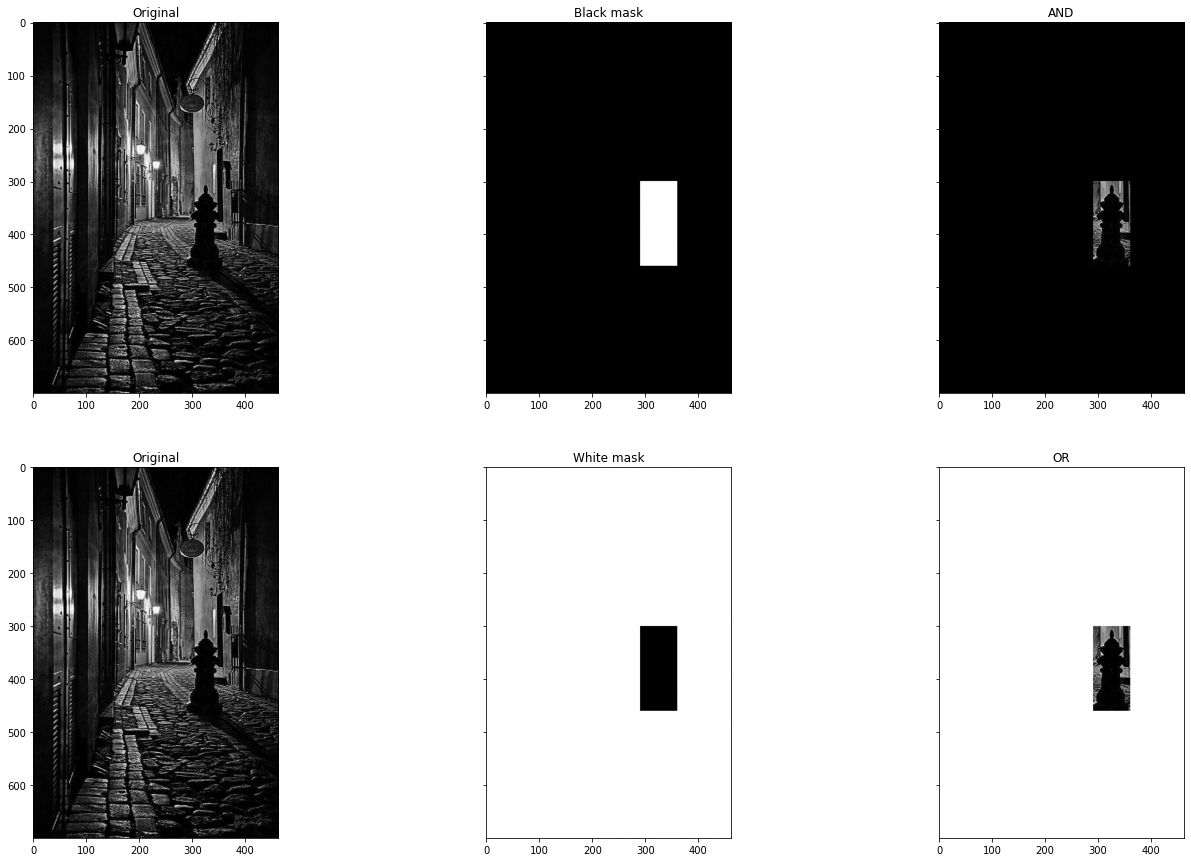

In [30]:
down_scale = 30

fig, axs = plt.subplots(2, 3, sharey=True, figsize = (image.shape[0]//down_scale, 
                                                      image.shape[1]//down_scale))

for i in range(len(masked_images1)):
  axs[0][i].imshow(masked_images1[i], cmap="gray", vmin=0, vmax=256)
  axs[0][i].title.set_text(names1[i])

for i in range(len(masked_images2)):
  axs[1][i].imshow(masked_images2[i], cmap="gray", vmin=0, vmax=256)
  axs[1][i].title.set_text(names2[i])
plt.show()